In [1]:
import ROOT
import math

Welcome to JupyROOT 6.18/04


In [2]:
c = ROOT.TCanvas()

In [3]:
def f(x,p):
    return p[0]*(math.exp(x[0]+x[1])/(1+(x[1]*math.sqrt(x[0]))/2))

In [4]:
xa = 0
xb = 0.5
ya = 1
yb = 3

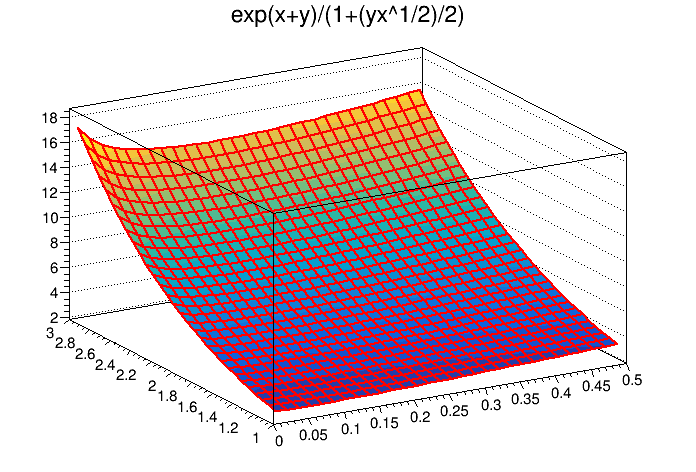

In [5]:
f1 = ROOT.TF2('exp(x+y)/(1+(yx^1/2)/2)', f, xa, xb, ya, yb, 1)
f1.SetParameter(0, 1)
f1.Draw('surf1')
c.Draw()

Метод Среднего

In [6]:
s = 0
s1 = 0

number = 1000

for i in range(1, 11):
    si = 0.0
    si1 = 0.0
    
    for j in range (0, number):
        xj = ROOT.gRandom.Uniform(xa, xb)
        yj = ROOT.gRandom.Uniform(ya, yb)
        fj = f1(xj, yj)
        
        si += fj*(xb - xa)*(yb - ya)
        si1 += (fj*(xb - xa)*(yb - ya))**2
        
    s += si
    s1 += si1
    
    Mi = si / number
    M = s / (i * number)
    
    Di = si1 / number - Mi**2
    sigmai = math.sqrt(Di / number)
    
    D = s1 / (i * number) - M**2
    sigma = math.sqrt(D / (i * number))
    
    print(i*1000, 'Мат. Ожидание:', Mi, ' Отклонение:', sigmai)
    print('     Мат. Ожидание для', i, 'итерации:', M, '   Отклонение', sigma, '\n')

1000 Мат. Ожидание: 7.221047468088693  Отклонение: 0.10918827103167467
     Мат. Ожидание для 1 итерации: 7.221047468088693    Отклонение 0.10918827103167467 

2000 Мат. Ожидание: 7.45825654193301  Отклонение: 0.11257442332408017
     Мат. Ожидание для 2 итерации: 7.339652005010852    Отклонение 0.07845892777433408 

3000 Мат. Ожидание: 7.355151922959964  Отклонение: 0.11300369671690608
     Мат. Ожидание для 3 итерации: 7.344818644327223    Отклонение 0.0644577458724793 

4000 Мат. Ожидание: 7.178666002095713  Отклонение: 0.1082720632352677
     Мат. Ожидание для 4 итерации: 7.3032804837693455    Отклонение 0.05541702904413851 

5000 Мат. Ожидание: 7.412321431574158  Отклонение: 0.10930644222393471
     Мат. Ожидание для 5 итерации: 7.325088673330308    Отклонение 0.04943446732131546 

6000 Мат. Ожидание: 7.327274899512412  Отклонение: 0.11338283851447281
     Мат. Ожидание для 6 итерации: 7.325453044360659    Отклонение 0.045322865224024025 

7000 Мат. Ожидание: 7.16334851705624  Отк

Выделение главной части

In [7]:
C = 1  #константа аналитической части

In [8]:
def F2(x, p):
    return p[0]*C * math.exp(x[1])*(1 + x[0])

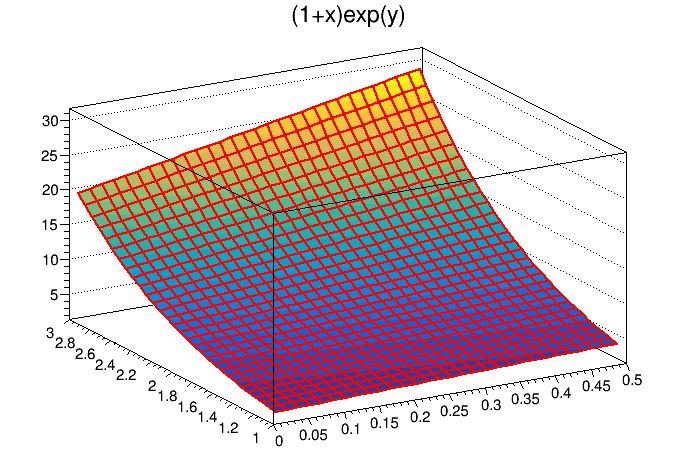

In [9]:
F2 = ROOT.TF2('(1+x)exp(y)', F2, xa, xb, ya, yb, 1)
F2.SetParameter(0, 1)
F2.Draw('surf1')
c.Draw()

In [10]:
def AnaliticIntegral(xa, xb, ya, yb):  #первая часть - аналитический интеграл
    result = (((1+xb)**2-(1+xa)**2)/2*(math.exp(yb)-math.exp(ya)))
    return max(0.0, result)

In [74]:
def F(x, p):  # Вторая функция
    return p[0]*((math.exp(x[0]+x[1])/(1 + x[1]*math.sqrt(x[0])/2))-C*math.exp(x[1])*(1+x[0]))
    #return f(x, p) - F2(x, [1])

In [71]:
AnaliticIntegral(xa, xb, ya, yb)

10.854534434205389

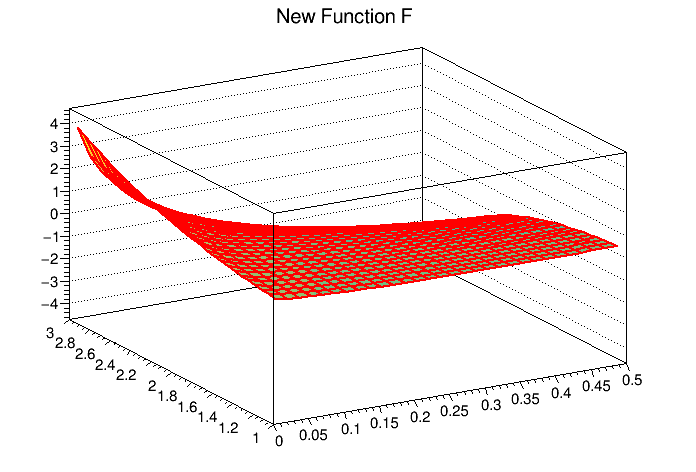

In [72]:
f2 = ROOT.TF2('New Function F', F, xa, xb, ya, yb, 1)
f2.SetParameter(0, 1)
f2.Draw('surf1')
c.Draw()

In [73]:
Fs = 0 
Fs1 = 0 

number = 1000

for i in range (1, 11):
    
    Fsi = 0 
    Fsi1 = 0 
    
    for j in range (0, number):
        
        xj = ROOT.gRandom.Uniform(xa, xb)
        yj = ROOT.gRandom.Uniform(ya, yb)
        fj = f2(xj, yj)
        
        Fsi += fj*(xb-xa)*(yb-ya)
        Fsi1 += (fj*(xb-xa)*(yb-ya))**2
    
    Fs += Fsi
    Fs1 += Fsi1
    
    FMi = Fsi / number
    FM = Fs / (i * number) 
    
    resi = (FMi + AnaliticIntegral(xb,xa,yb,ya))
    res = (FM + AnaliticIntegral(xb,xa,yb,ya))    
    
    FDi = Fsi1 / number - FMi**2
    Fsigmai = math.sqrt(FDi / number) 
    
    FD = Fs1 / (number * i) - FM**2
    Fsigma = math.sqrt(FD / (i * number))
    
    
    print(i*1000, "Мат. Ожидание:", resi, " Отклонение:", Fsigmai)
    print("   Мат.Ождание для", i, "итерации:", res, "   Отклонение:", Fsigma, "\n")

1000 Мат. Ожидание: 10.762360344119518  Отклонение: 0.035741923979909745
   Мат.Ождание для 1 итерации: 10.762360344119518    Отклонение: 0.035741923979909745 

2000 Мат. Ожидание: 10.703529971744995  Отклонение: 0.0362897246195696
   Мат.Ождание для 2 итерации: 10.732945157932257    Отклонение: 0.02547626223127475 

3000 Мат. Ожидание: 10.745486215729768  Отклонение: 0.03697789890591833
   Мат.Ождание для 3 итерации: 10.737125510531426    Отклонение: 0.020985787806381252 

4000 Мат. Ожидание: 10.736127923785729  Отклонение: 0.03614567486022778
   Мат.Ождание для 4 итерации: 10.736876113845002    Отклонение: 0.018148932761625287 

5000 Мат. Ожидание: 10.777860642719785  Отклонение: 0.03547395832353782
   Мат.Ождание для 5 итерации: 10.745073019619959    Отклонение: 0.01616154159800568 

6000 Мат. Ожидание: 10.809547367730318  Отклонение: 0.035380922233123155
   Мат.Ождание для 6 итерации: 10.755818744305017    Отклонение: 0.014705591762091177 

7000 Мат. Ожидание: 10.715458869639065  О